In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# import confusion_matrix_pretty_print
# from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

# from sklearn.metrics import confusion_matrix,classification_report,precision_score,auc,precision_recall_curve,roc_curve

# import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
# from keras import metrics as kmetr
# from keras.utils import plot_model


In [4]:
#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform'
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense( 3, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
model.load_weights('model with zeros_3Epoch_revised.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                222272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

In [18]:
#### plotting model
# plot_model(model,show_shapes = True, to_file='model.png')

In [32]:
predicts = []
e = d = z = 0
zeroIndexes = []
DegIndexes = []
EnhIndexes = []
k = 0
for i in range(0,279354,46559):
    j = i + 46559

    X_test = pd.read_csv('../../triple_cosineSNF(zeros)_rivised.csv').values[i:j, 3:]

    testNum = len(X_test)
    #reshape data to fit model
    X_test = X_test.reshape(testNum, 16, 71, 1)

    #predict first 4 images in the test set
    predit = model.predict(X_test)
    X_test = []
    
    pd.DataFrame(predit).to_csv('predict_' + str(k) + '_without softmax.csv', index=False)
#     predit
    k += 1
    f = 0
    for a,b,c in predit:
        if a >=0.95:
            predicts.append(0)
            d += 1
            DegIndexes.append(i + f)
            f += 1
            

        elif c>=0.95:
            predicts.append(2)
            e += 1
            EnhIndexes.append(i + f)
            f += 1
        else:
            predicts.append(1)
            z += 1
            zeroIndexes.append(i + f)
            f += 1
#     predit = []
    print('degrassive', d, 'enhancive', e, 'zeros', z)
    pd.DataFrame(EnhIndexes).to_csv('enhansive indexes_' + str(k-1) +'predict triple for bio evidance.csv', index=False)
    EnhIndexes = []
    
    pd.DataFrame(DegIndexes).to_csv('Degrassive indexes_' + str(k-1) +'predict triple for bio evidance.csv', index=False)
    DegIndexes = []
    
    pd.DataFrame(zeroIndexes).to_csv('zero indexes_' + str(k-1) +'predict triple for bio evidance.csv', index=False)
    zeroIndexes = []

In [ ]:
pd.DataFrame(predit).plot.density()
plt.show()

In [ ]:
pd.DataFrame(predit).iloc[:,0].plot.density()
plt.show()

In [ ]:
pd.DataFrame(predit).iloc[:,1].plot.density()
plt.show()

In [ ]:
pd.DataFrame(predit).iloc[:,2].plot.density()
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('frequency Histogram of Zero Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('frequency Histogram of Degrassive Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,2], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('frequency Histogram of encreasive Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()

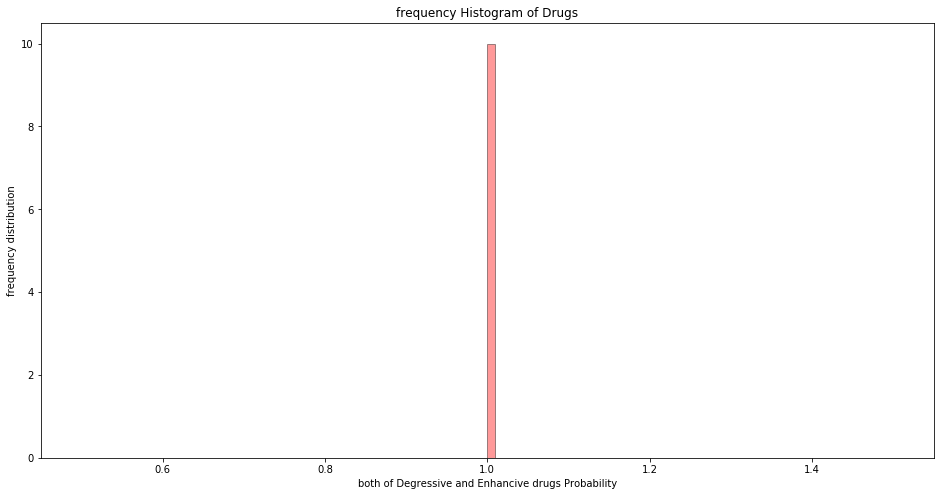

In [3]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
sns.distplot(pd.DataFrame(predit).iloc[:,2], hist=True, kde=False, 
             bins=int(100), color = 'green',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')
plt.show()